In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
 def draw_pie(ax,ratios=[0.4,0.6], X=0, Y=0, size = 1000,alpha=1):
    N = len(ratios)
 
    xy = []
    
    start = 0.
    for ratio in ratios:
        x = [0] + np.cos(np.linspace(2*np.pi*start,2*np.pi*(start+ratio), 30)).tolist()
        y = [0] + np.sin(np.linspace(2*np.pi*start,2*np.pi*(start+ratio), 30)).tolist()
        xy1 = list(zip(x,y)) # list needed for python 3
        xy.append(xy1)
        start += ratio
 
    for i, xyi in enumerate(xy):
        h = ax.scatter([X],[Y] , marker=(xyi,0), s=size, facecolor=colors[i],alpha=alpha)
    return h

def pie_size(n):
    return 60+n*50

In [3]:
df = pd.read_excel('ECSS_participants_anonymized.xlsx')
country = df['Country']
nation = df['Nationality']
print ('Participants from %s countries' %len(country.unique()))
print ('Participants from %s nationalities' %len(nation.unique()))
loc = pd.read_excel('Country_loc.xlsx')
detected_names = [a for a in loc['Name'] if a in country]

country_dict = []
for cc in country.unique():
    data = df['Nationality'][df['Country']==cc].values
    lon = loc['Lon'][loc['Name'] == cc].values
    lat = loc['Lat'][loc['Name'] == cc].values
    if not lat:
        print ('Name',cc)
        print ('data',data)
        print ('lon',lon)

    country_dict.append({'name':cc,'data':data,'lon':lon,'lat':lat})
print ('%s countries identified' %len(country_dict))

Participants from 34 countries
Participants from 33 nationalities
34 countries identified


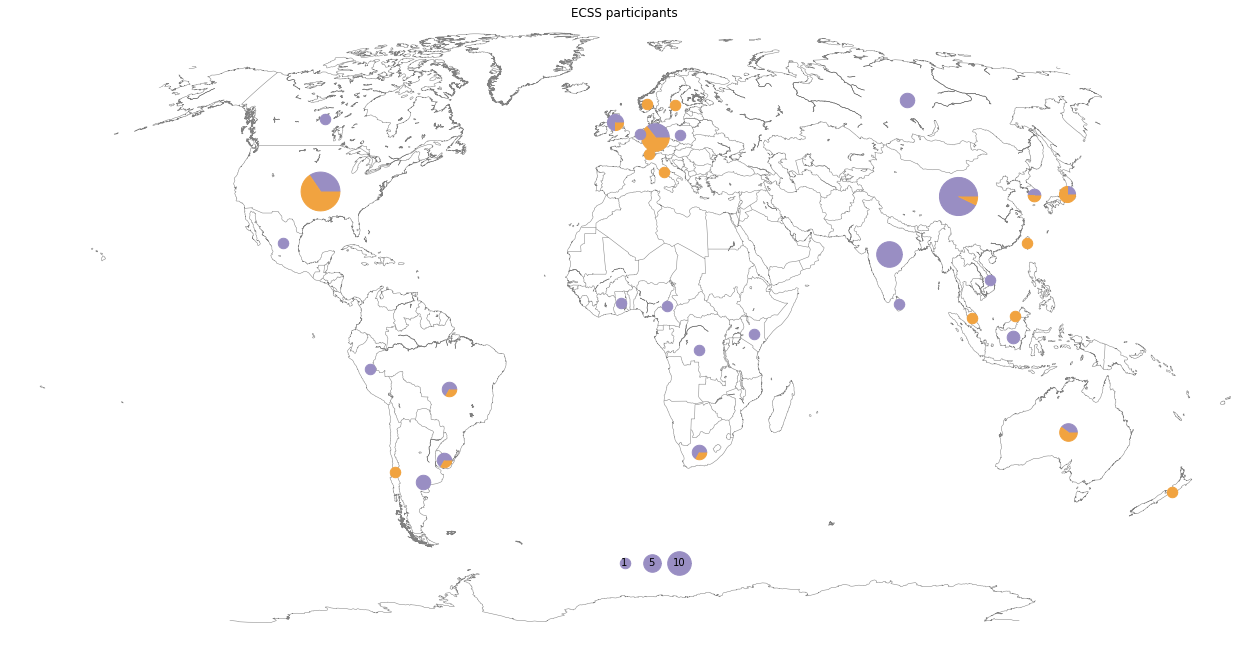

In [4]:
# Prepare a global map of the CLIVAR ESC Participants
# Visualize the amount of people working in each country by circle size

fig = plt.figure(figsize=(22, 12))
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
m = Basemap(lon_0=0, projection='robin',resolution='l')
m.drawmapboundary(color='w')
m.drawcoastlines(color='0.5',linewidth=0.5,zorder=1)
m.drawcountries(color='0.5',linewidth=0.5,zorder=1)

colors = ['#998ec3','#f1a340']

for co in country_dict:
    X,Y = m(co['lon'],co['lat'])
    s = pie_size(len(co['data']))
    foreign_idx = co['data']!=co['name']
    foreign_frac = sum(foreign_idx)/float(len(co['data']))
    if foreign_frac > 0:
        f = [1-foreign_frac,foreign_frac]
    else:
        f = [1]
        
    h = draw_pie(ax,f, X, Y,size=s)

# Construct legend
Lx1,Ly1 = m(0, -60)
Lx2,Ly2 = m(10, -60)
Lx3,Ly3 = m(20, -60)


plt.text(Lx1,Ly1,'1',horizontalalignment='center',verticalalignment='center');
plt.text(Lx2,Ly2,'5',horizontalalignment='center',verticalalignment='center');
plt.text(Lx3,Ly3,'10',horizontalalignment='center',verticalalignment='center');
draw_pie(ax,[1],Lx1,Ly1,size=pie_size(1));
draw_pie(ax,[1],Lx2,Ly2,size=pie_size(5));
draw_pie(ax,[1],Lx3,Ly3,size=pie_size(10));

plt.title('ECSS participants')
plt.gcf().savefig('participants.pdf')